In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('EnergyProduction.csv', index_col=0, parse_dates=True)

In [2]:
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


In [3]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

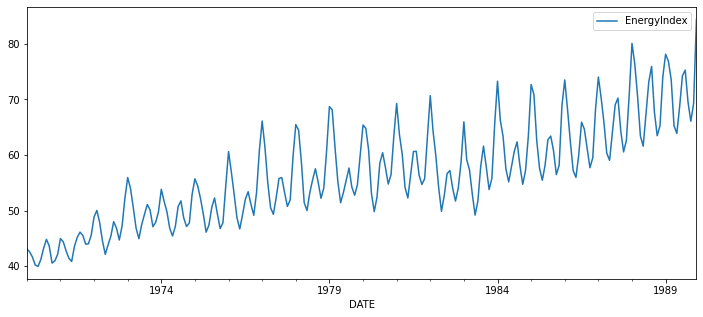

In [4]:
df.plot(figsize=(12, 5))

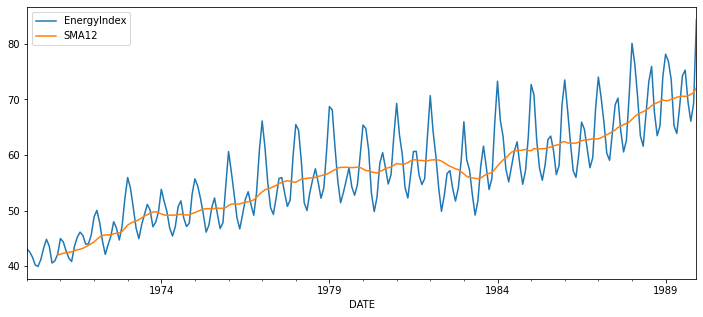

In [5]:
df['SMA12'] = df['EnergyIndex'].rolling(window=12).mean()
df.plot(figsize=(12, 5))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


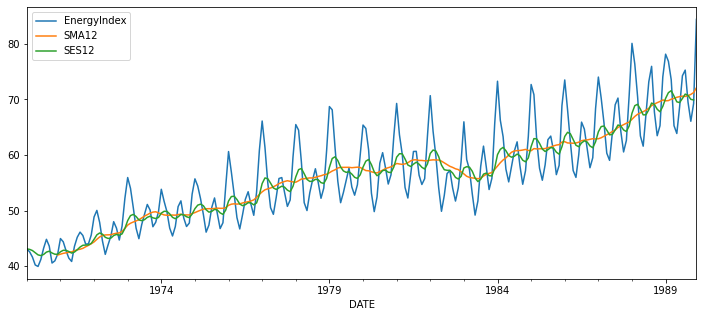

In [6]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

df['SES12'] = SimpleExpSmoothing(df['EnergyIndex']).fit(smoothing_level=2/(12+1), optimized=False).fittedvalues.shift(-1)
df.plot(figsize=(12, 5))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


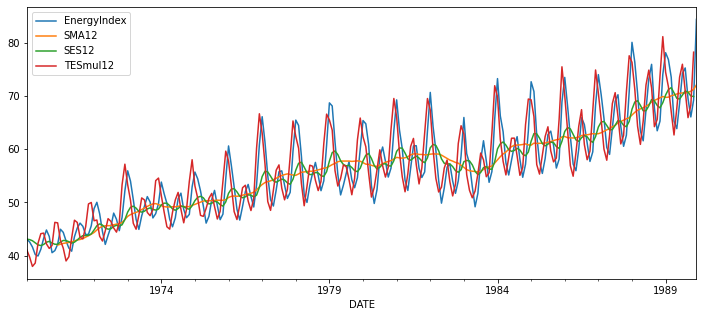

In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['TESmul12'] = ExponentialSmoothing(df['EnergyIndex'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues.shift(-1)
df.plot(figsize=(12, 5))

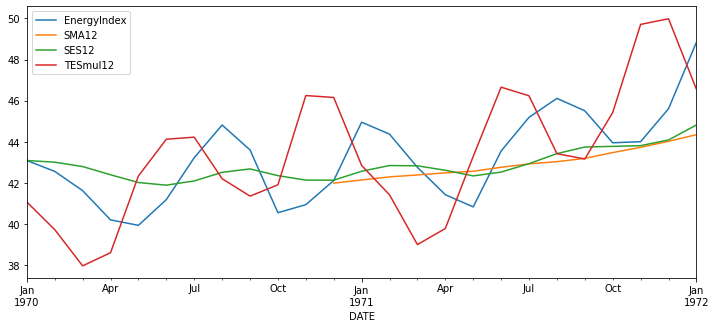

In [9]:
df[:'1972-01-01'].plot(figsize=(12, 5))